<a href="https://colab.research.google.com/github/dbsdlsdud/AIStudy24/blob/master/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EB%B3%B5%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install xgboost
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 7.5 MB/s eta 0:00:00


# 분류, 전처리

1. 표준점수 공식 : (원본 데이터 - 평균) / 표준편차 = 표준점수
2.결정계수 식

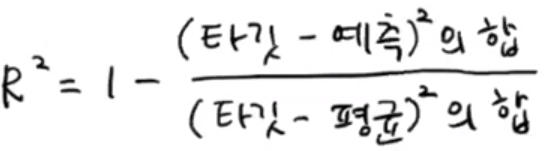

3. 직선의 방정식 = (y = mx + n)
    * y = (mx(농어의 무게(15) * 기울기(coef_)) + n(절편(intercept_)))
    * y = (mx(농어의 무게(50) * 기울기(coef_)) + n(절편(intercept_)))

4. 곡선의 방정식
    * 제곱한 농어의 무게(1492.77) = 계수[0] * 50 ** 2 - 계수[1] * 농어의 무게(50) + 인터셉트

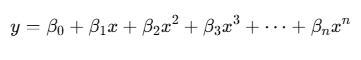

In [ ]:
# 도미 35개, 빙어 14개 총 49개
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
# 넘파이 배열용 파이썬 라이브러리
import numpy as np
# .column_stack() 열_쌓기
fish_data = np.column_stack((fish_length, fish_weight)) # fish_data변수에 2차원 배열 저장(길이, 무게)
print(fish_data[:3]) # 앞쪽 3개 출력

# Numpy

(과학적 계산, 데이터 분석, 머신러닝 등의 분야에서 유용하게 사용되는 라이브러리)

1. 배열 생성 : 다양한 방법으로 배열 생성 가능
2. 배열 연산 : 매우 직관적이고 빠르게 연산 가능
3. 브로드캐스팅 : 다른 크기의 배열들을 자동으로 맞춰서 연산
4. 배열 인덱싱 및 슬라이싱 :원하는 값 추출 가능
5. 수학적 함수 : 다양한 수학적 함수 제공
6. 난수 생성 : 다양한 방법으로 난수 생성 가능

In [ ]:
# 정답파일 생성
# .concatenate() 1차원 배열
fish_target = np.concatenate((np.ones(35),np.zeros(14))) # 1이 35개, 0이 14개
print(fish_target)

In [ ]:
from sklearn.model_selection import train_test_split
# 학습용, 테스트용 분할
tri, tei, trt, tet = train_test_split(fish_data, fish_target)
# tri,trt : 훈련용 입력값,정답, tei,tet : 테스트용 입력값,정답
# .shape : 배열 크기를 알려주는 메서드
print(tri.shape) # 36개, 특성 2개(fish_length, fish_weight)
print(trt.shape) # 36개
print(tei.shape) # 13개, 특성 2개(fish_length, fish_weight)
print(tet.shape) # 13개

#  train_test_split

(scikit-learn 라이브러리에서 제공되며 주어진 데이터를 무작위로 나눠 모델 학습에 필요한 데이터를 훈련용(train), 검증용(test)으로 분할하는데 사용한다.)

* 훈련 데이터 : 모델 학습에 사용
* 테스트 데이터 : 학습된 모델의 성능을 평가하는데 사용

(이 분할을 통해 과대적합(overfitting)을 방지하고 모델이 새로운 데이터에 대해 일반화가 잘 되는지 확인 할 수 있다.)

* 과대적합 방지 : 훈련 데이터 적합 모델이 테스트 데이터에서 성능이 떨어지지 않도록 하기 위한 분리
* 성능 평가 : 데이터 의존 최소화 및 새로운 데이터에 대한 일반화 확인
* 데이터 무작위 분할 : 데이터 순서에 따른 영향 최소화 및 데이터 순서에 대한 의존 최소화

train_input, test_input, train_target, test_target = train_test_split(X, y, test_size=0.25, random_state=None, shuffle=True)

1. X : 특성(입력 데이터), 2D 배열이나 DataFrame이어야 한다.
2. Y : 타겟(출력 데이터), 1D 배열이어야 한다.
3. test_size=0.25 : 데이터의 25%를 테스트 데이터로 75%를 학습 데이터로 나눈다는 의미
4. train_size : 훈련 데이터 비율(지정하지 않으면 test_size로 나머지 데이터 비율 자동 지정)
5. random_state : 데이터를 나누는 방식을 일관성있게 설정하는 시드값으로 동일한 시드를 사용하면 항상 동일한 데이터 분할을 얻을 수 있다.
6. shuffle : 데이터를 나누기 전 무작위로 섞을지에 대한 여부 (기본값 True, False로 설정하면 데이터를 섞지않고 순서대로 나눈다.)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier # k-이웃 근접 알고리즘, 분류용

kn = KNeighborsClassifier() # 객체 생성
kn.fit(tri,trt) # 훈련 시작 tri : 36개, 특성 2개(fish_length, fish_weight), trt : 1,0 36개

# KNeighborsClassifier

(k-최근접 이웃 분류기(k-Nearest Neighbors Classifier)를 구현한 scikit-learn라이브러리의 클래스)

* 분류 문제에서 주로 사용되며 주변 데이터(가장 가까운 k개의 데이터)에 기반하여 새로운 데이터를 분류한다.
* 지도 학습 방법 중 하나로 훈련된 모델을 사용해 새로운 입력 데이터의 클래스를 예측하는 데 사용한다.
* 간단하고 직관적
* 학습 과정이 없고 예측 시 데이터 저장을 하며 그 데이터를 바탕으로 예측하는 비모수(연속 되지 않은) 모델
* 다중 클래스 분류 문제와 회귀 문제에도 사용 할 수 있는 범용성

(만약 k=3인 경우 새로운 데이터 포인트가 들어왔을 때 그 데이터와 가장 가까운 3개의 이웃들을 찾고 그 중 가장 많이 있는 클래스를 예측 결과로 반환한다.)

1. n_neighbors : 가장 가까운 이웃의 수 설정 (기본값 : 5)
2. weights : 예측 시 각 이웃에 부여할 가중치 설정
    * uniform : 모든 이웃에 동일한 가중치 부여
    * distance : 거리가 가까운 이웃에 더 높은 가중치 부여
3. algorithm : 거리 계산을 위한 알고리즘 설정 (기본값 : auto)
    * auto, ball_tree, kd_tree, brute 등이 있다
    * auto는 적합한 알고리즘을 자동으로 선택한다
4. metric : 거리 계산 시 사용되는 거리 함수를 설정 (기본값 : minkowski)
    * 유클리디안 거리와 맨하탄 거리의 일반화된 형태로 p=2일 경우 유클리디안 거리와 같다
5. leaf_size : Ball_tree or KD_tree 사용 시 트리의 리프 크기 설정 (기본값 : 30)

(모든 데이터를 메모리에 저장하는데 훈련 데이터 전체를 메모리에 저장해야 하므로 메모리 사용량이 많으며 큰 데이터셋에서는 성능이 저하될 수 있다. 즉 특성이 많을수록 성능이 떨어진다)

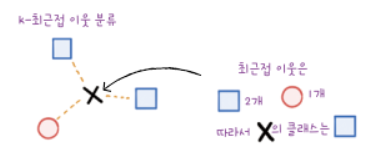

In [ ]:
kn.score(tri,trt) # 훈련 정확도 100% : 과대적합
kn.score(tei,tet) # 테스트 정확도 100% : 과대적합

In [ ]:
# 차트로 보기, 전처리, 추가 값에 대한 이웃 확인
import matplotlib.pyplot as plt

plt.scatter(tri[:,0],tri[:,1]) # 훈련용 데이터셋(파란색)
plt.scatter(tei[:,0],tei[:,1]) # 테스트용 데이터셋(주황색)
# 25, 150 : 알고 싶은 값, marker = '^' : 삼각형 표시
plt.scatter(25, 150, marker = '^') # 추가 값(초록색 삼각형)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
# X축과 Y축 비율이 달라서 정확한 판단이 어려움

# matplotlib.pyplot

(pyplot의 별칭이 plt일때 사용법)

1. 그래프 그리기
    * 선 그래프 plt.plot() : 데이터 연결하는 선을 그림
    * 산점도 그래프 plt.scatter() : 데이터를 점으로 나타냄
    * 히스토그램 plt.hist() : 데이터 분포를 시각화 하는데 사용
    * 서브플롯 plt.subplot() : 여러 개의 그래프를 한 화면에 표시할 때 사용
2. 그 외에 자주 사용하는 함수
    * plt.title(), plt.xlabel(), plt.ylabel() : 제목, x축 라벨, y축 라벨 추가
    * plt.legend(), plt.show() : 범례 추가, 그래프 표시
3. 그래프 외형 변경 가능 plt.style.use()
4. 선택적 속성으로 선 색상(color), 선 두께(linewidth), 선 스타일(linestyle), 점 스타일(marker)을 바꿀 수 있다.

In [ ]:
# distances : 각 이웃까지의 거리 제공
# indexes : 데이터에 있는 인덱스 제공
distances, indexes = kn.kneighbors([[25,150]]) # 2차원 배열로 입력 (최근접 이웃 찾기)
print('distances',distances)
print('indexes',indexes)

In [ ]:
plt.scatter(tri[:,0],tri[:,1]) # 훈련용 데이터셋(파란색)
plt.scatter(tei[:,0],tei[:,1]) # 테스트용 데이터셋(주황색)
plt.scatter(25, 150, marker = '^') # 추가 값(초록색 삼각형)
plt.scatter(tri[indexes,0], tri[indexes,1], marker = 'D') # 추가 값의 이웃(빨간색 사각형)
plt.xlim((0,1000)) # 정확한 판단을 위해 x축 범위 0 ~ 1000으로 지정
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# 평균 구하기
# axis : 중심선, axis = 0 : row(행)기준, axis = 1 : column(열)기준
# .mean : 평균 계산, .std : 표준편차 계산
mean = np.mean(tri, axis = 0) # 열 기준으로 평균 계산
std = np.std(tri, axis = 0) # 열 기준으로 표준편차 계산
print('tri 평균 : ',mean)
print('tri 표준편차 : ', std)
print("=======================================================================================================")
mean1 = np.mean(tei, axis = 0) # 열 기준으로 평균 계산
std1 = np.std(tei, axis = 0) # 열 기준으로 표준편차 계산
print('tei 평균 : ',mean1)
print('tei 표준편차 : ', std1)

* 표준 점수는 각 데이터가 원점에서 몇 표준편차만큼 떨어져 있는지를 나타내는 값이다.
* 분산은 데이터에서 평균을 뺀 값을 모두 제곱한 다음 평균을 내어 구한다.
* 표준 편차는 분산의 제곱근으로 데이터가 분산된 정도를 나타낸다.

In [ ]:
# (원본 데이터 - 평균) / 표준편차 = 표준점수 (표준점수 공식)
trs = (tri - mean) / std
tes = (tei - mean1) / std1
print(trs[:3])
print(tes[:3])

넘파이는 tri의 모든 행에서 mean에 있는 평균 값을 빼주고

std에 있는 표준편차를 다시 모든 행에 적용한다. (브로드캐스팅)

In [ ]:
# 전처리 데이터 이용 (모델 훈련) 추가 값 표준점수로 변환 후 출력
new = ([25,150] - mean) / std
print('new : ',new)

plt.scatter(trs[:,0],trs[:,1]) # 훈련용 데이터셋(파란색)
plt.scatter(tes[:,0],tes[:,1]) # 테스트용 데이터셋(주황색)
plt.scatter(new[0], new[1], marker = '^') # 추가 값(초록색 삼각형)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# 훈련 시작
kn.fit(trs, trt)

In [ ]:
kn.score = (tes, tet)
print(kn.predict([new]))

In [ ]:
# distances : 각 이웃까지의 거리 제공
# indexes : 데이터에 있는 인덱스 제공
distances, indexes = kn.kneighbors([new]) # 최근접 이웃 찾기
plt.scatter(trs[:,0],trs[:,1]) # 훈련용 데이터셋(파란색)
plt.scatter(tes[:,0],tes[:,1]) # 테스트용 데이터(주황색)
plt.scatter(new[0],new[1],marker = '^')
plt.scatter(trs[indexes,0],trs[indexes,1],marker = 'D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

# 이웃 회귀

In [ ]:
# 농어 샘플자료 56개
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [ ]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.title('perch length ↑ = weight ↑')
plt.show() # 길이가 커짐에 따라 무게도 늘어남

In [ ]:
tri, tei, trt, tet = train_test_split(perch_length, perch_weight)
# perch_length가 1차원 배열이기 때문에 tri, tei도 1차원 배열이다
# .reshape() 메서드로 2차원 배열 변환 가능
tea = np.array([1,2,3,4])
print('tea : ',tea)
print('tea.shape : ',tea.shape)
print("=======================================================================================================")
tea = tea.reshape(2,2)
print('tea : ',tea)
print('tea.shape : ',tea.shape)

In [ ]:
# 입력데이터 tri, tei 2차원 배열로 바꾸기
# .reshape(행,열) -1을 넣으면 원소 갯수로 모두 채우라는 의미
# 행 값에 -1을 넣고 열 값을 지정하면 배열의 행 수가 알아서 지정 된다.
tri = tri.reshape(-1,1)
tei = tei.reshape(-1,1)
print(tri.shape, tei.shape)

In [ ]:
# 훈련 시작
from sklearn.neighbors import KNeighborsRegressor # k-이웃 근접 알고리즘, 회귀용

knr = KNeighborsRegressor()
knr.fit(tri, trt)

# KNeighborsRegressor

(k-최근접 이웃(k-Nearest Neighbors)알고리즘을 사용해 회귀 문제를 해결하려는 모델)

* 훈련 데이터 자체를 사용해 새로운 데이터를 예측한다. 즉 데이터를 저장하고 예측할 때 이 데이터를 사용해 가장 가까운 이웃을 찾는다.
* 데이터가 선형적으로 분포하지 않는경우에도 유효한 예측을 할 수 있다.
* 실제로 훈련 데이터셋을 저장만하기 때문에 훈련시간이 매우 빠르며 모델 학습이 간단하다.
* K값을 조정하는 것만으로도 모델 성능을 조정할 수 있다는 점에서 매개변수 튜닝이 쉬운 편이다.

(만약 k=3인 경우 새로운 데이터 포인트가 들어왔을 때 그 데이터와 가장 가까운 3개의 이웃들을 찾고 그 3개의 평균값을 예측 결과로 반환한다.)

1. n_neighbors : 가장 가까운 이웃의 수 설정 (기본값 : 5)
2. weights : 예측 시 각 이웃에 부여할 가중치 설정
    * uniform : 모든 이웃에 동일한 가중치 부여
    * distance : 거리가 가까운 이웃에 더 높은 가중치 부여
3. algorithm : 거리 계산을 위한 알고리즘 설정 (기본값 : auto)
    * auto, ball_tree, kd_tree, brute 등이 있다
    * auto는 적합한 알고리즘을 자동으로 선택한다
4. metric : 거리 계산 시 사용되는 거리 함수를 설정 (기본값 : minkowski)
    * 유클리디안 거리와 맨하탄 거리의 일반화된 형태로 p=2일 경우 유클리디안 거리와 같다
5. leaf_size : Ball_tree or KD_tree 사용 시 트리의 리프 크기 설정 (기본값 : 30)

(새로운 데이터를 예측할 때 마다 훈련 데이터 전체와의 거리를 계산해야 하기 때문에 훈련 데이터가 많으면 예측 시간이 많이 소요될 수 있어서 성능이 저하될 수 있고 이상치에 민감하여 이상치가 포함되면 가까운 이웃의 평균을 구할 때 영향을 미친다.)

이상치 : 다른 자료와는 극단적으로 다른 값

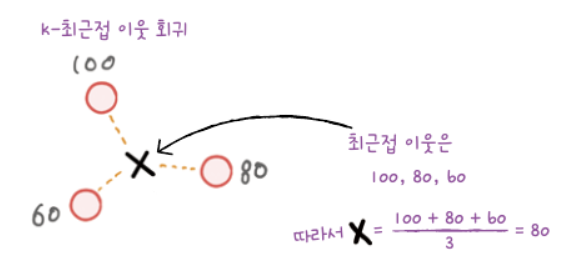

In [ ]:
knr.score(tei, tet)

In [ ]:
from sklearn.metrics import mean_absolute_error # 절대값 오차를 평균하여 반환
tep = knr.predict(tei) # 테스트 세트에 대한 예측 만들기
mae = mean_absolute_error(tet, tep) # 테스트 세트에 대한 평균 절대값 오차 계산
print(tep)
print('타깃과 예측값 차이 : ',mae)

# mean_absolute_error

(회귀 문제에서 모델의 예측 성능을 평가하는 지표 중 하나로 모델이 예측한 값과 실제 값 사이의 차이를 절대값으로 계산해서 그 평균을 구한 값이다.)

* 모델이 얼마나 정확한지 쉽게 이해할 수 있는 지표
* 실제 값과 예측 값이 길이와 같은 단위를 가질 경우 MAE도 길이 단위를 가진다.
* MAE는 절대값을 사용해서 극단적인 이상치에 대해서  MSE보다 덜 민감하지만 영향을 받을 순 있다.
* 이상치 : 다른 자료와는 극단적으로 다른 값

In [ ]:
# 과소적합 : 훈련세트보다 테스트세트 점수가 높거나 두 점수가 모두 낮은 경우
# 과대적합 : 훈련세트보다 테스트세트의 점수가 굉장히 나쁠 경우
print('훈련 세트',knr.score(tri, trt))
print('테스트 세트',knr.score(tei, tet))

In [ ]:
# 사이킷런 알고리즘 기본값 3개로 조절해서 다시 훈련
knr.n_neighbors = 3
knr.fit(tri, trt)

In [ ]:
print('훈련 세트',knr.score(tri,trt))
print('테스트 세트',knr.score(tei,tet))

In [ ]:
knr = KNeighborsRegressor() # 회귀 객체 생성
x = np.arange(5, 45).reshape(-1,1) # 5 ~ 44까지 x좌표 생성

# n이 1,3,5,10일 때의 예측 결과 그래프
for n in [1,3,5,10]:
    # 모델 훈련
    knr.n_neighbors = n
    knr.fit(tri, trt) # 훈련세트 점수, 테스트세트 점수 계산
    prd = knr.predict(x) # 지정 범위 x에 대한 예측
    plt.scatter(tri, trt)
    plt.plot(x, prd)
    plt.title('n_neighbors = {}'.format(n))
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()

# k-최근접 한계

In [ ]:
# 사이킷런을 이용해 훈련세트, 테스트세트 나누기
tri, tei, trt, tet = train_test_split(perch_length, perch_weight)
# .reshape(행,열) -1을 넣으면 원소 갯수로 모두 채우라는 의미
# 행 값에 -1을 넣고 열 값을 지정하면 배열의 행 수가 알아서 지정 된다.
tri = tri.reshape(-1, 1)
tei = tei.reshape(-1, 1)
print(tri.shape, tei.shape)

In [ ]:
knr = KNeighborsRegressor(n_neighbors = 3) # # 사이킷런 알고리즘 기본값 3개로 조절해서 훈련
knr.fit(tri, trt)

In [ ]:
print('50cm농어 무게 예측 결과 : ',knr.predict([[50]]))

In [ ]:
# distances : 각 이웃까지의 거리 제공
# indexes : 데이터에 있는 인덱스 제공
distances, indexes = knr.kneighbors([[50]])
plt.scatter(tri, trt) # 훈련세트 데이터
plt.scatter(tri[indexes], trt[indexes], marker = 'D') # 이웃 데이터
plt.scatter(50, 1000, marker = '^') # 50cm농어 데이터
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
print('평균값 : ',np.mean(trt[indexes]))
print('100cm 결과 : ',knr.predict([[100]]))
# 기본 데이터 부족으로 한계가 있음

* k-근접 이웃 알고리즘 대안 -> 선형회귀(linear) : 비교적 간단하고 성능이 뛰어남 (직선학습 알고리즘)
* 가로로 된 빨간선 : 농어의 무게를 1개로 인식
* 위에서 아래로 떨어지는 빨간선 : 반대로 예측
* 아래에서 위로 올라가는 빨간석 : 정상적인 차트

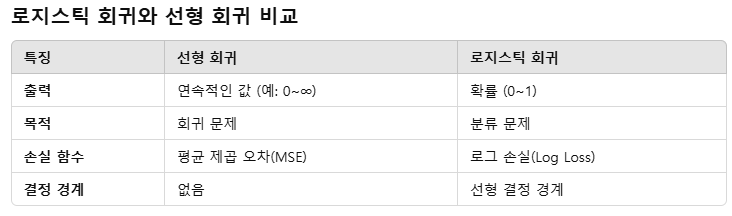

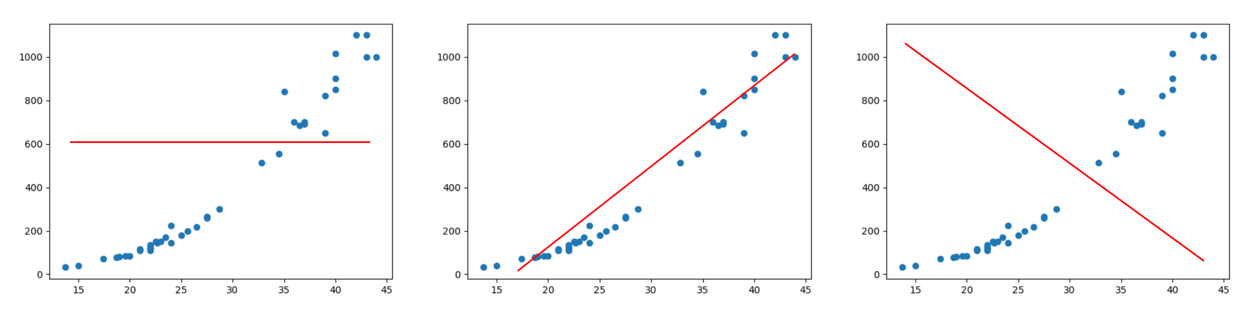

In [ ]:
# 사이킷런에서 제공하는 선형 회귀용 클래스
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(tri, trt) # 훈련 시작

# LinearRegression

(데이터를 기반으로 선형 관계를 모델링하는 기법으로 이를 통해 입력 변수 X와 출력 변수 Y 간의 선형 방정식(Y = mX + b)에서 (slope)기울기(m)와 (intercept)절편(b)를 학습한다.)



In [ ]:
print('계수 : ', lr.coef_, ', 인터셉트 : ', lr.intercept_)
print(lr.predict([[50]]))
# 직선의 방정식 = (y = mx + n)
# y = (mx(농어의 길이(15) * 기울기(coef_)) + n(절편(intercept_)))
# y = (mx(농어의 무게(50) * 기울기(coef_)) + n(절편(intercept_)))
print([15,50],[15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

In [ ]:
plt.scatter(tri, trt)
plt.plot([15,50],[15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])
plt.scatter(50, 1147, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
print(lr.score(tei, tet))
print(lr.score(tri, trt))

선형회귀의 문제점 : 왼쪽 하단에 있는 기준점 불일치 해결방법
* 다항회귀 공식 사용해서 곡선 만들기
* 다항회귀는 선형회귀의 확장으로 특성 값에 대해 다항식을 사용해 더 복잡한 관계를 모델링 하고
* 다항식 차수가 커질수록 모델은 더 복잡한 곡선을 그릴 수 있다.
* 선형회귀 모델을 사용하되 다항식 특성을 추가해 예측을 수행한다.

In [ ]:
trp = np.column_stack((tri **2, tri))
tep = np.column_stack((tei **2, tei))
print(trp.shape, tep.shape)
print('[[제곱값, 일반값]]')
print(trp[:3])

In [ ]:
lr = LinearRegression()
lr.fit(trp, trt) # 훈련 시작

In [ ]:
# 테스트 할때 모델의 농어 길이 제곱과 원래 길이를 함께 넣는다.
print('[[2500, 50]]에 대해 선형 회귀 방식으로 예측한 결과 : ',lr.predict([[50 **2,50]]))

In [ ]:
# 제곱한 농어의 무게(1492.77) = 계수[0] * 50 ** 2 - 계수[1] * 농어의 무게(50) + 인터셉트
print('계수 : ', lr.coef_, ', 인터셉트 : ', lr.intercept_)
point = np.arange(15, 50)
print('원래 길이 : ', point, '\n제곱 길이 : ', lr.coef_[0] * point **2 - lr.coef_[1] * point + lr.intercept_)
예측 = lr.predict([[50 **2,50]])
# 훈련세트로 산점도 그리기
plt.scatter(tri, trt)
plt.plot(point, lr.coef_[0] * point **2 - lr.coef_[1] * point + lr.intercept_)
plt.scatter([50], 예측, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

print(lr.score(trp, trt))
print(lr.score(tep, tet))

# 다중회귀, 특성공학
* 과소적합 해결하기 위한 다중회귀를 사용
* 다중회귀 : 여러개 특성을 사용한 선형회귀
* 각 특성을 서로 곱해서 또 다른 특성을 만들어 새로운 특성을 뽑아내는 것이 특성공학이다.

In [ ]:
# 데이터 준비 : 판다스에서 제공하는 데이터 프레임 사용
# 판다스 : 데이터 분석용 라이브러리(csv -> 배열)
# csv : 엑셀에서 텍스트를 뽑아낸 메모장 파일

import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print('[[길이, 높이, 너비]]')
print(perch_full[15:18])

perch_weight = np.array( # 농어 무게
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

# pandas

(데이터 분석과 조작에 사용되는 라이브러리로 데이터를 다루는데 있어 테이블 형식으로 관리가 가능하며 데이터 프레임(DataFrame)을 사용해 쉽게 처리가 가능하다)

1. 주요 객체
    * Series : 1차원 데이터 (리스트, 배열 형태)
    * DataFrame : 2차원 데이터 (엑셀 시트와 비슷)
2. 딕셔너리를 사용한 데이터 프레임 생성
3. CSV 파일 읽기
    * csv 파일 불러오기 : 변수.read_csv
    * 첫 5행 보기 : 변수.head()
4. 기본 데이터 분석
    * 열별 기본 통계량 : 변수.describe()
    * 특정 열 선택 : 변수["Age"]
    * 조건 필터링 변수[변수(나이가 30 이상인 사람) : ["Age"] >= 30]
5. 데이터 조작
    * 새 열 추가 : 변수["Salary"] = [50000, 60000, 70000]
    * 열 이름 변경 : 변수.rename(columns={"City": "Location"}, inplace=True)
    * 데이터 정렬 : 변수.sort_values(by="Age", ascending=False, inplace=True)
6. 결측값 처리
    * 결측값 채우기 : 변수.fillna(0, inplace=True)
    * 결측값 삭제 : 변수.dropna(inplace=True)

In [ ]:
# 훈련세트, 테스트세트 나누기
tri, tei, trt, tet = train_test_split(perch_full, perch_weight)
print('판다스에서 준 데이터(길이, 높이, 너비) : ', tri[0], ', 넘파이 데이터(무게) : ', trt[0])

In [ ]:
# 사이킷런 변환기는 특성을 만들거나 전처리하는 클래스가 있다.
# PolynomialFeatures() :  다항식 변환을 수행하는 클래스
# 변환기(Transformer) 메서드 : fit(), transform()
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
# fit() 메서드와 transform() 메서드를 차례대로 실행해야 변환이 된다.
poly.fit([[2,3]]) # 첫번째 특성 2와 두번째 특성 3으로 이루어진 샘플하나 적용(거듭제곱)
print('기본값 안 삭제 : ',poly.transform([[2,3]])) # 변환
# [[1. 2. 3. 4. 6. 9.]]
# 1 : 기본값
# 2
# 3
# 4 = 2 ** 2
# 6 = 2 * 3
# 9 = 3 ** 2

# 기본값 삭제하는 방법 (자동으로 절편항은 무시하지만 알아두면 좋다)
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2,3]]) # 훈련 시작
print('기본값 삭제 : ',poly.transform([[2,3]]))
print('어떻게 만들어 졌는지 확인 : ',poly.get_feature_names_out())

In [ ]:
# PolynomialFeatures(include_bias=False) False를 적는 이유
# 사이킷런의 선형 모델은 자동으로 bias를 추가하는데 bias특성을 만들 필요가 없다.
# 만약에 아무것도 쓰지 않거나 True를 쓸 경우
# bias특성을 포함해서 42개의 요소에 10개의 특성이 된다.
poly = PolynomialFeatures(include_bias=False)

poly.fit(tri) # 훈련 시작
trp = poly.transform(tri) # 훈련용 세트 변환
print(trp.shape) # 42개의 요소에 9개의 특성
print('어떻게 만들어졌는지 확인 : ',poly.get_feature_names_out())
tep = poly.transform(tei) # 테스트용 세트 변환
print(tep.shape)
print("=======================================================================================================")
lr = LinearRegression()
lr.fit(trp, trt) # 훈련 시작
print('훈련 세트 점수 : ',lr.score(trp, trt))
print('테스트 세트 점수 : ',lr.score(tep, tet))
print('특성 조합 수 기본값 : ',poly.degree)

In [ ]:
# 정확한 값을 보기 위해 특성 조합 수 더 늘려보기
# degree = 5 : 기본값 2에 3제곱, 4제곱, 5제곱 항 추가
poly = PolynomialFeatures(include_bias=False, degree = 5)
poly.fit(tri) # 훈련 시작
trp = poly.transform(tri)
tep = poly.transform(tei)
print(trp.shape, tep.shape) # 특성이 55개로 증가
print('어떻게 만들어졌는지 확인 : ',poly.get_feature_names_out())
print("=======================================================================================================")
lr.fit(trp, trt) # 훈련 시작
print('훈련 세트 점수 : ',lr.score(trp, trt))
print('테스트 세트 점수 : ',lr.score(tep, tet))
print('특성 조합 수 기본값 : ',poly.degree)

* 특성을 늘리면 선형모델은 강력해지지만 자료보다 특성이 많으면 과대적합이 될 수 있다.
* 해결방법 : 규제(reqularization)라는 것을 적용하면 과대적합이 되지 않게 할 수 있다.
* 선형회귀 모델에 규제를 추가한 모델 두가지
1. 릿지(ridge) : 계수를 제곱한 값을 기준으로 규제(선호) / 모든 변수를 사용하고 싶을 때
2. 라쏘(lasso) : 계수의 절댓값을 기준으로 규제 적용 -> 0으로 제공 가능 / 변수 선택 기능이 필요할 때
* 릿지와 라쏘 모델 사용할 때 규제 양 임의로 조절 가능
(모델 객체 만들때 alpha매개값을 주면 된다.)
* alpha : 계수값을 더 줄이고 조금 더 과소적합이 되도록 유도하는용도
(alpha 값을 크게 주면 강도가 세진다,)

In [ ]:
# 규제 추가 전 성능 향상과 효율적인 모델 학습을 위해
# 표준점수로 변환 할 수 있는 StandatdScaler() 클래스 추가
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(trp) # 훈련 시작
trs = ss.transform(trp)
tes = ss.transform(tep)
print(trs.shape, tes.shape)

# StandardScaler
1. 특성 간 스케일 차이 제거
2. 모델 성능 향상
3. 경사하강법 성능 개선

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(trs, trt) # 훈련 시작

# Ridge
영향력이 있는 경우(다중공선성), 활동하는 모습이 보일 가능성이 큰 경우, 모든 모델을 포함하고 있을 때

1. L2 정규화 사용
    * 문제들의 스퀘어합을 패널티로 추가하여 큰 문제를 제기한다.
2. 과적합 방지
    * 표준화로 인해 데이터를 거부하는 것을 방지, 일반화 성능을 개선한다.
3. 모든 변수 유지
    * 라쏘 활동(Lasso Regression)과 달리는 것을 보호하는 0으로 남아메리카 모든 활동을 모델에 헬멧
4. 러시아공선성 해결
    * 효과를 발휘하여 협력관계를 맺을 수 있다.

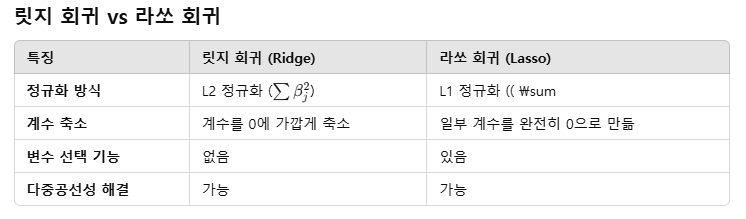

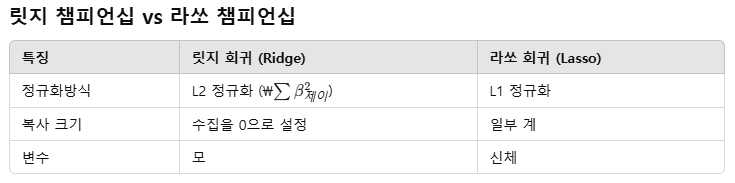

In [ ]:
# 모델 객체 생성시 alpha매개변수로 규제 강도를 조절한다.
print('훈련 세트 점수 : ',ridge.score(trs, trt))
print('테스트 세트 점수 : ',ridge.score(tes, tet))

In [ ]:
# alpha 값 바꿀때 마다 score() 메서드 결과 값을 저장 할 리스트 생성
trsc = []
tesc = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100] # 0.001~10배씩 증가
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha) # 릿지 모델 만들기
    ridge.fit(trs, trt) # 훈련
    trsc.append(ridge.score(trs, trt)) # 훈련 점수
    tesc.append(ridge.score(tes, tet)) # 테스트 점수

# .log10(alpha_list) x축 값이 너무 촘촘하게 보일까봐 지수형식으로 표현
# (지수형식) 0.001 : -3 / 0.01 : -2 / 0.1 : -1
plt.plot(np.log10(alpha_list), trsc) # 훈련 점수
plt.plot(np.log10(alpha_list), tesc) # 테스트 점수
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show() # 0.1일때 제일 좋은 점수로 파악

In [ ]:
ridge = Ridge(alpha=0.1)
ridge.fit(trs, trt) # 훈련
print(ridge.score(trs, trt))
print(ridge.score(tes, tet))

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(trs, trt) # 훈련
print(lasso.score(trs, trt)) # 점수
print(lasso.score(tes, tet)) # 반환

# Lasso
L1 정규화는 회귀 계수의 절댓값 합에 패널티를 부과하는데 이로 인해 일부 계수가 정확히 0이 되므로 불필요한 변수가 모델에서 제거 된다. 즉 모델의 해석 가능성이 높아지고 차원 축소 효과가 있음

1. L1 정규화 사용
    * 불필요한 변수의 회귀 계수를 0으로 만들어 모델에서 제외
2. 변수 선택 - 많은 독립 변수 중 중요한 변수만 선택하고 싶을 때
    * 자동으로 중요하지 않은 변수를 모델에서 제거하므로 차원 축소 효과를 제공한다.
3. 과적합 방지 - 복잡한 모델에서 일반화 성능을 개선하고 싶을 때
    * 모델이 데이터에 지나치게 맞추는 것을 방지하여 일반화 성능을 향상시킨다
4. 희소성(Sparsity) - 최종 모델을 해석하기 쉽게 만들고 싶을 때
    * 최종 모델에서 중요한 변수만 남기고 나머지는 0이 되므로 해석이 쉬워진다

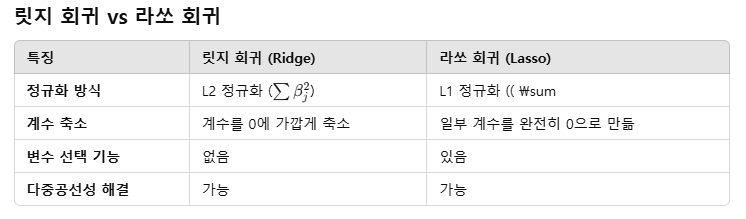

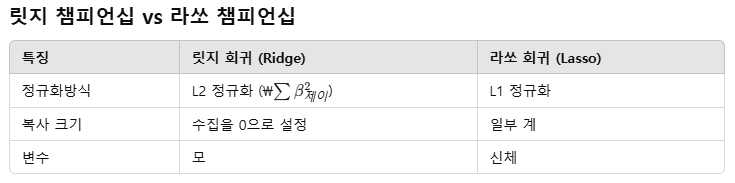

In [ ]:
# 알파값 조절
trsc = []
tesc = []
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100] # 0.001~10배씩 증가
for alpha in alpha_list:    # max_iter : 반복횟수
    lasso = Lasso(alpha=alpha, max_iter=10000) # 라쏘 모델 만들기
    lasso.fit(trs, trt) # 훈련
    trsc.append(lasso.score(trs, trt)) # 훈련세트 점수 저장
    tesc.append(lasso.score(tes, tet)) # 테스트세트 점수 저장
# 지정 반복횟수가 부족하면 경고 발생 ConvergenceWarning

In [ ]:
plt.plot(np.log10(alpha_list), trsc)
plt.plot(np.log10(alpha_list), tesc)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show() # 제일 좋은 값 : -1 ~ 0 -> 0.1 ~ 1

In [ ]:
lasso = Lasso(alpha = 0.1) # 제일 좋은 값으로 적용
lasso.fit(trs, trt) # 훈련
print(lasso.score(trs, trt))
print(lasso.score(tes, tet))

In [ ]:
lasso = Lasso(alpha = 1) # 제일 좋은 값으로 적용
lasso.fit(trs, trt) # 훈련
print(lasso.score(trs, trt))
print(lasso.score(tes, tet))

# 로지스틱회귀

In [ ]:
# 샘플데이터 준비
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head() # 제일 윗쪽 데이터 5개

In [ ]:
print(pd.unique(fish['Species'])) # .nuique : 유일한 값 출력
# 분석용 입력값 생성
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
print('분석용 입력값 \n',fish_input[:5]) # 앞에서부터 5개 출력
# 정답 리스트 생성
fish_target = fish['Species'].to_numpy()
print('정답 리스트 ',fish_target[:5]) # 앞에서부터 5개 출력
# 훈련용, 테스트용 나누기
tri, tei, trt, tet = train_test_split(fish_input, fish_target)
print('훈련용 : 119개의 5개 특성', tri.shape, '테스트용 : 40개의 5개 특성', tei.shape)

In [ ]:
# 표준점수화
ss = StandardScaler()
ss.fit(tri) # 훈련
trs = ss.transform(tri)
tes = ss.transform(tei)
print(trs[:2])
print(tes[:2])

kn = KNeighborsClassifier(n_neighbors = 3) # 이웃 3개 참고
kn.fit(trs, trt) # 훈련

In [ ]:
print('훈련용',kn.score(trs, trt))
print('테스트용',kn.score(tes, tet))
print('2개 이상 클래스가 포함된 다중 분류',kn.classes_)
print('앞에 5개 샘플을 타깃값 예측',kn.predict(tes[:5]))
print('확률값 \n',tes[:5]) # ['Perch' 'Smelt' 'Pike' 'Perch' 'Perch'] 순서

In [ ]:
proba = kn.predict_proba(tes[:5])
# decimals = 4 : 소수점 네번째 자리까지 표시, 다섯번째에서 반올림
print(np.round(proba, decimals = 4))
# ['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish'] 순서

In [ ]:
# 계산한 확률이 가장 가까운 이웃의 비율이 맞는지 확인
distances, indexes = kn.kneighbors(tes[3:4])
print(trt[indexes])
#  n_neighbors = 3 으로 했기 때문에 7개가 나오지 못함

로지스틱회귀(LogisiticRefression) : 사이킷런에서 제공하는 분류모델
 * 선형회귀와 동일하게 선형방정식 학습
* z = a * (Weight) + b * (Length) + c * ( Diagonal) + d * (Height) + e * (Width) + f
* a, b, c, d, e, f는 각 항복에 대한 가중치(중요도, 계수)
* z는 어떤 값도 가능하지만 확률이 되려면 0~1(0%~100%)사이값
* z가 아주 큰 음수일때 0, 아주 큰 양수일때 1이 되도록 바꾸는 방법은 시그모이드 함수, 로지스틱함수

시그모이드 함수용
* z가 무한하게 큰 음수일 경우 0에 가까원지고 z가 무한하게 큰 양수일 경우 1에 가까워진다

In [ ]:
z = np.arange(-5, 5, 0.1) # -5~5까지 0.1간격으로 배열 생성
phi = 1 / (1 + np.exp(-z)) # np.exp()함수로 시그모이드 적용
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

이진분류
* 이진분류일 경우 시그모이드 함수 출력이 0.5보다 크면 양성, 0.5보다 작으면 음성으로 판단
* 단 0.5가 나오면 라이브러리마다 다르지만 사이킷런은 음성으로 판단

In [ ]:
# 로지스틱회귀로 이진분류 수행 테스트
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

# 같은 방식으로 훈련세트에서 도미,빙어 행만 골라내기
bream_smelt_indexes = (trt == 'Bream') | (trt == 'Smelt')
trbs = trs[bream_smelt_indexes]
tabs = trt[bream_smelt_indexes]

In [ ]:
# 사이킷런 선형모델에 로지스틱회귀 클래스 사용
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(trbs, tabs) # 훈련 시작

# LogisticRegression
LogisticRegression은 이진분류 문제를 해결하기 위해 널리 사용되는 선형분류 알고리즘이다.

주요 특징
1. 선형 결정 경계
    * 독립 변수의 선형 결합으로 클래스 분리를 수행한다.
2. 확률 기반 출력
    * 출력값은 특정 클래스에 속할 확률을 나타내며 0과 1 사이로 제한된다.
3. 이진 분류 문제에 적합
    * y가 0또는 1로 정의된 문제에 주로 사용된다. 다중 클래스 분류의 경우 확장된 버전이 Softmax Refression이나 One-vs-Rest를 사용한다.
4. 확률적 해석:
    * 회귀 계수는 변수 값이 1단위 증가할 때 Odds Ratio의 로그 변화량을 나타낸다.

활용
1. 의학 : 질병 진단(환자가 특정 질병에 걸릴 확률 예측)
2. 금융 : 고객이 대출을 상환할 확률 예측
3. 마케팅 : 특정 제품 구매 여부 예측

장점
1. 간단하고 빠름 : 구현히 쉽고 계산 비용이 낮다.
2. 확률적 해석 가능 : 예측 결과를 확률로 해석할 수 있다.
3. 과적합 방지 : L1(Lasso) 또는 L2(Ridge) 정규화를 추가하여 과적합을 방지 할 수 있다.

단점
1. 선형성 가정 : 독립 변수와 종속 변수 간의 선형 관계를 가정한다.
2. 복잡한 관계 표현 불가 : 비선형 분류에는 적합하지 않는다.
3. 다중공선성 문제 : 독립 변수 간 상관관계가 크면 성능이 저하될 수 있다.

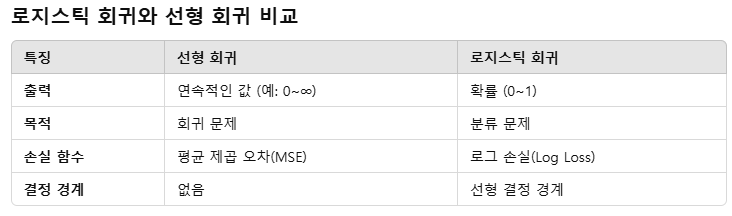

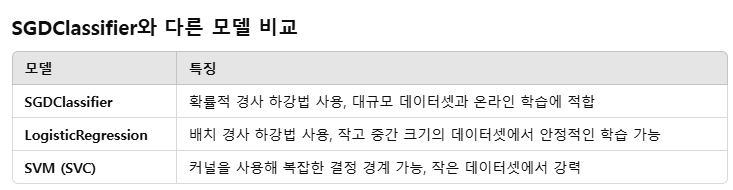

In [ ]:
print('trbs 처음 5개 값', lr.predict(trbs[:5]))
print('확률 확인 \n',lr.predict_proba(trbs[:5])) # 확률 확인

# 로지스틱회귀로 학습한 계수(중요도) 알아보기
print('계수 알아보기 \n',lr.coef_, lr.intercept_)

decisions = lr.decision_function(trbs[:5])
print('trbs 처음 5개 값',decisions)

In [ ]:
# 사이파이(scipy) 라이브러이에도 시그모이드 함수가 있다 -> expit()
from scipy.special import expit
print(expit(decisions)) # phi = 1/ 1(np.exp(-1))

다중분류 (이진분류는 True아니면 모두 False처리 된다.)

* 현재 어종 7개를 로지스틱 회귀로 분류 학습하기
* LogisticRegression 클래스는 기본적으로 반복적인 알고리즘을 사용하고 (max_iter 기본값 100) 릿지 회귀와 같은 계수를 제곱을 규제한다(L2 규제)
* 릿지 회귀에서는 alpha매개변수로 규제 양을 조절했다 -> alpha가 크면 규제도 커진다
* 로지스틱 회귀에서는 규제를 제어하는 매개변수가 C로 되어있다 -> C가 작으면 규제가 커진다(기본 1) 규제를 완화하기 위해 20으로 향상
* max_iter 반복횟수를 100으로 하면 부족하다라는 경고 문구가 나와 1000으로 향상

In [ ]:
lr = LogisticRegression(C=20, max_iter=1000) # 정확도를 위해 1000번 반복
lr.fit(trs, trt)

print('훈련',lr.score(trs, trt))
print('테스트',lr.score(tes,tet))
print(lr.predict(tes[:5]))

In [ ]:
proba = lr.predict_proba(tes[:5])
print(np.round(proba, decimals = 3))
print(lr.classes_)

In [ ]:
# 다중 분류일때 선형방정식
print(lr.coef_.shape, lr.intercept_.shape)

* (7, 5) : 7개의 행, 5개의 특성
* (7, ) : 7개의 행 -> 이진 분류에서 보았던 z를 7개를 계산
* 다중 분류는 클래스마다 z값을 하나씩 계산한다는 의미다.
* 당연히 가장 높은 z값을 출력하는 클래스가 예측 클래스가 된다.
* 이진분류에서는 시그모이드 함수를 사용해 z를 0과 1사이 값으로 변환했다.
* 다중분류에서 소프트맥스 함수를 사용해 7개의 z값을 확률로 변환한다.
소프트맥스 계산법
* e_sum = e^z1 + e^z2 + e^z3 +e^z4 + e^z5 + e^z6 + e^z7
* s1 = e^z1 / e_sum ...... s7 = e^z7 / e_sum -> s1 ~ s7 까지 모두 더하면 분모가 같아져서 1이 된다.

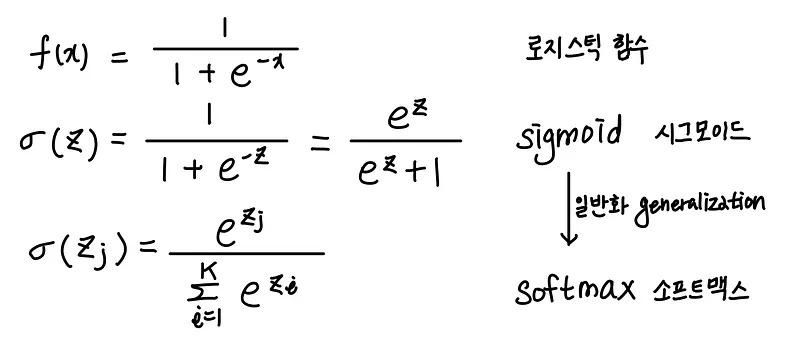

In [ ]:
decision = lr.decision_function(tes[:5])
print('5개의 샘플에 대한 z1~z7의 값 \n')
for idx, z in enumerate(decision):
    print(f'{idx}번째의 샘플의 z값 \n{z}\n')

In [ ]:
# 소프트맥스 함수로 예측확률 구하기
from scipy.special import softmax
class_ = lr.classes_.tolist() + ["예측 결과"]
prd = lr.predict(tes[:5]).reshape(5, -1)
sm = softmax(decision, axis=1).round(2) * 100
con = np.column_stack((sm,prd))
print(pd.DataFrame(con,columns=class_))

# Softmax

Softmax함수는 로짓 값을 지수 함수로 변환하여 상대적인 중요성을 강조한다
* 큰 값은 더 큰 확률을 가지고 작은 값은 확률이 작아진다

활용
1. 다중 클래스 분류
    * 각 클래스의 확률을 계산하고 가장 높은 확률의 클래스를 예측값으로 선택
2. 확률 분포 추출
    * 예측 확률을 통해 모델의 불확실성을 분석
3. 뉴럴 네트워크
    * 출력층에서 Softmax를 사용해 각 클래스에 대한 확률 계산

한계
1. 클래스 간 독립성 가정
    * Softmax는 클래스 간 상호 배타성을 가정한다. 즉 하나의 클래스 확률이 증가하면 다른 클래스 확률이 감소한다.
2. 큰 로짓 값의 영향
    * 큰 값과 작은 값 간의 차이를 지수 함수가 확대하므로 큰 값이 지나치게 강조될 수 있다.

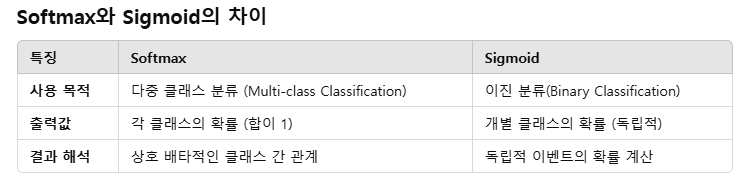

# 확률적경사하강법

점진적 학습

* 당면한 문제 : 훈련데이터가 한번에 준비되는 것이 아니라 조금씩 전달됨

해결법

1. 기존 훈련 데이터에 새로운 데이터를 추가하여 모델을 매일매일 다시 훈련
    * 단점 : 시간이 지날수록 데이터가 늘어난다 -> 인력추가, 서버증설, 시간적 여유 줄어듬 -> 지속 가능성
2. 새로운 데이터를 추가 할 때 마다 이전 데이터를 버림 -> 훈련데이터 크기를 일정하게 유지하는 방법
    * 단점 : 데이터를 버릴때 다른 데이터에 없는 중요한 생선 데이터가 포함될때
3. 점진적 학습 (온라인 학습) : 훈련한 모델을 버리지 않고 조금씩 새로운 데이터를 학습한다.
    * 확률적 경사 하강법 (실제 산에서 내려오는 것 처럼 가파른 길을 찾아 천천히 조금씩 내려옴)
    * 확률적 : (무작위, 랜덤) / 훈련 세트에서 랜덤하게 하나의 샘플을 고름
    * 경사 : 기울기, 하강 : 내려가는
    * 확률적 경사 하강법은 훈련세트에서 랜덤하게 하나의 샘플을 선택해 가파른 경사를 조금 내려간다.
    * 위 방법을 반복수행
    * 만약 모든 샘플을 다 사용해도 다 내려오지 못할 경우 처음부터 다시 시작하고
    * 훈련세트에 모든 샘플을 다시 채워 넣고 다시 랜덤하게 하나의 샘플을 선택해 이어서 경사를 내려감
    * 만족하는 위치에 도달 할 때까지 계속 내려간다.
    * 훈련세트를 한 번 모두 사용하는 과정을 에포크(epoch)라고 한다.
    * 일반적인 경사 하강법은 수십, 수백번 에포크를 수행한다.

결론

1. 훈련세트에서 랜덤하게 하나의 샘플을 선택해서 가파른 경사를 조금씩 내려가고
2. 훈련세트에서 랜덤하게 또 다른 샘플을 하나 선택해 경사를 조금 내려간다 -> 전체샘플을 모두 사용할 때까지 진행

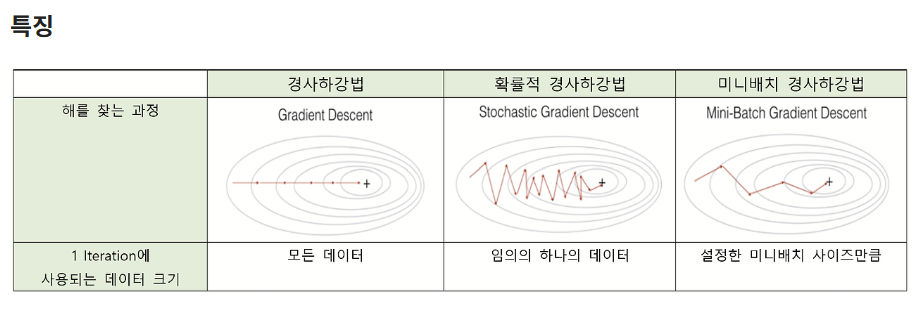

* 위 방법대로 샘플 1개를 이용하면 너무 무책임하게 내려갈 수 있다.
* 잘못된 훈련으로 결과가 나오면 돌아갈 수 없다.
* 이런 문제점을 해소하려고 무작위로 몇개의 샘플을 선택해서 경사를 내려간다면 -> 미니배치 경사 하강법 (여러개 샘플 사용)
* 배치 경사하강법 : 극단적으로 한 번 경사로를 따라 이동(전체 샘플 사용) -> 단점 : 컴퓨터 자원을 너무 많이 사용한다, 한번에 전체 데이터를 모두 읽을 수 없을 수 있다.
* 확률적 경사 하강법은 훈련세트를 사용해 산 아래에 있는 최적의 장소로 조금씩 이동
* 이떄문에 훈련 데이터가 모두 준비돼있찌 않고 매일매일 업데이트 돼도 학습을 이어나갈 수 있다. (다시 산꼭대기부터 시작 할 필요가 없다.) -> 신경망 알고리즘 사용
1. 손실 함수(Loss function) : 머신러닝이 알고리즘이 얼마나 엉터리인지 측정하는 기준(작을 수록 좋음)
    * 이 값을 찾아서 조금씩 이동
2. 비용 함수(Cost function) : 훈련세트에 있는 모든 샘플에 대한 손실함수의 합
3. 에포크(epoch : 시대) : 훈련세트를 한 번 모두 사용하는 과정

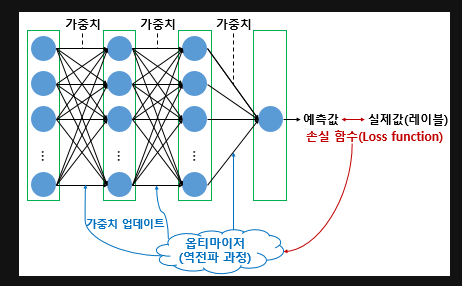

In [ ]:
# fish 데이터 가져오기
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head() # 윗쪽 5개 출력

In [ ]:
# Species(어종) -> 제외한 나머지 필드를 fish_input이라는 변수에 리스트로 넣음
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy() # Species 정답파일 생성
print(fish_target)

In [ ]:
np.set_printoptions(precision = 6, suppress = True) # 지수를 정수로 변환
tri, tei, trt, tet = train_test_split(fish_input, fish_target) # 훈련세트,테스트세트 나누기
print('tri \n', tri)
print('tei \n', tei)

In [ ]:
# 요소, 특성 확인
print('tri의 요소와 특성 : ',tri.shape)
print('tei의 요소와 특성 : ',tei.shape)
print('trt 정답 \n',trt,'\n',trt.shape)
print('tet 정답 \n',tet,'\n',tet.shape)

In [ ]:
# 훈련세트, 테스트세트 특성 표준화
ss = StandardScaler()
ss.fit(tri)
trs = ss.transform(tri)
tes = ss.transform(tei)
print('훈련세트 \n', trs[:2])
print('훈련세트 \n', tes[:2])

In [ ]:
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss = 'log_loss', max_iter = 10, random_state = 42)
sc.fit(trs, trt) # 훈련 시작
print('훈련 : ',sc.score(trs, trt))
print('테스트 : ',sc.score(tes, tet))

In [ ]:
# 훈련할 모델을 sc로 추가
sc.partial_fit(trs, trt) # 부분적(partial) 학습
print('훈련 : ',sc.score(trs, trt))
print('테스트 : ',sc.score(tes, tet))
# 퍼센트 증가

# SGDClassifier
SGDClassifier는 Scikit-learn에서 제공하는 선형 분류 알고리즘으로 확률적 경사 하강법을 사용하여 모델을 최적화한다. 대규모 데이터셋이나 온라인 학습에서 효과적이며 다양한 손실 함수를 사용해 여러 유형의 문제를 해결할 수 있다.

특징
1. 확률적 경사 하강법
    * 데이터를 배치(batch)가 아닌 한 번에 하나의 샘플로 업데이트하므로 메모리가 효율적이다.
    * 대규모 데이터셋에서도 빠르게 학습이 가능하다.
2. 다양한 손실 함수
    * 로지스틱회귀, 서포트 백터 머신(SVM) 등 여러 모델을 구현할 수 있다.
    * 주요 손실 함수
        * hinge : SVM(서포트 백터 머신)에서 사용
        * log_loss : 로지스틱회귀(확률 출력 제공)
        * modified_huber : 강건한 이진 분류
        * squared_hinge : SVM의 제곱 힌지 손실
        * perceptron : 퍼셉트론 알고리즘
3. 정규화 옵션
    * L1, L2 또는 ElasticNet 정규화(혼합)를 지원해 과적합을 방지한다.
4. 온라인 학습 가능
    * 데이터가 점진적으로 들어오는 상황에서 partial_fit 메서드를 사용해 학습할 수 있다.

주요 매개변수
* loss : 손실함수 선택(hinge, log_loss, squared_hinge, perceptron 등)
* penalty : 정규화 방법(12, 11, elasticnet)
* alpha : 정규화 강도(기본값 : 0.0001)
* learning_rate : 학습률 스케줄(constant, optimal, invscaling, adaptive)
* eta0 : 초기 학습률(기본값:0.0,learning_rate='constant'일 때 유효)
* max_iter : 최대 반복 횟수(기본값:1000)
* tol : 종료 기준(기본값 : 1000)
* early_stopping : 조기 종료 여부(기본값 : False)
* n_iter_no_change : 조기 종료 시 성능 향상이 없는 최대 반복 수(기본값 : 5)
* random_state : 난수 시드 고정

장점
1. 효율적 학습 : 데이터셋 크기가 매우 큰 경우에도 빠른 학습
2. 다양한 문제 해결 : 여러 손실 함수를 지원하여 다양한 유형의 문제에 적용 가능
3. 온라인 학습 : 데이터가 실시간으로 주어질 때 적합
4. 메모리 효율성 : 전체 데이터를 메모리에 로드하지 않아도 학습 가능

단점
1. 하이퍼파라미터 튜닝 필요 : 학습률, 정규화 강도 등 파라미터가 결과에 큰 영향을 미침
2. 민감성 : 데이터 스케일링(표준화)이 필요하며 초기 학습률 설정이 중요
3. 수렴 문제 : 반복 횟수나 학습률이 적절하지 않으면 수렴하지 않을 수 있음

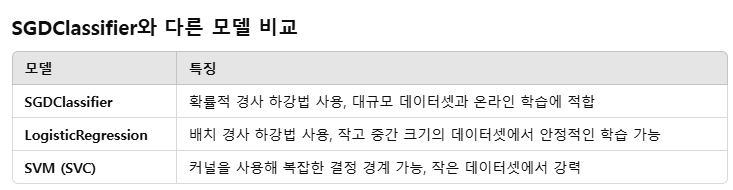

에포크와 과대/과소적합

* 확률적 경사 하강법을 사용한 모델은 에포크 횟수에 따라 과소,과대 적합이 될 수 있다.
* 에포크 횟수가 적으면 훈련 세트를 덜 학습한다. (119개에서 10번만 랜덤추출하고 정지)
* 에포크 횟수가 충분히 많으면 훈련 세트를 완전히 학습 할

바꿔 말하면 적은 에포크 횟수 동안에 훈련된 모델은 훈련세트와 테스트세트에 맞지 않는다(과소적합)

반대로 에포크 횟수가 많은 훈련 모델인 경우 너무 잘 맞아 테스트세트에는 오히려 점수가 나쁘다(과대적합)

* 과대적합이 되기 전에 훈련을 멈추는 것을 조기 종료

In [ ]:
sc = SGDClassifier(loss = 'log_loss')
# 훈련세트, 테스트세트 누적 빈 리스트 생성
trsc = []
tesc = []
# 생성목록 제공
classes = np.unique(trt)
for _ in range(0,300) : # 에포크 300번 훈련
    # partial_fit : 부분적으로 훈련 추가
    sc.partial_fit(trs, trt, classes = classes)
    # 반복마다 훈련세트, 테스트세트 점수를 계산해서
    # trsc, tesc 리스트에 추가
    trsc.append(sc.score(trs, trt))
    tesc.append(sc.score(tes, tet))

print(trsc)
print(tesc)

In [ ]:
# 그래프로 보기
plt.plot(trsc) # 훈련세트 점수
plt.plot(tesc) # 테스트세트 점수
plt.xlabel('epoch') # 에포크 횟수
plt.ylabel('accuracy') # 정확도
plt.show()

In [ ]:
# 확률적 경사 하강법은 일정 에포크 동안 성능이 향상되지 않으면
# 더이상 훈련하지 않고 자동으로 멈춤
sc = SGDClassifier(loss = 'log_loss', max_iter = 100, tol = None)
sc.fit(trs, trt) # 훈련
print(sc.score(trs, trt))
print(sc.score(tes, tet))

In [ ]:
# predict : 예측
sc.predict(tes[:5])
proba = sc.predict_proba(tes[:5])
# decimals = 3 : 소수점 3번째 까지
np.round(proba, decimals = 3)

In [ ]:
sc.classes_

In [ ]:
# 또 달든 머신러닝 알고리즘을 위한 손실 함수 : loss = 'hinge'
# loss 매개값의 기본 값 : hinge(힌지손실) -> 서포트 백터 머신이라고 부름
sc = SGDClassifier(loss = 'hinge', max_iter = 100, tol = None)
sc.fit(trs, trt) # 훈련
print(sc.score(trs, trt))
print(sc.score(tes, tet))

# 결정트리

In [ ]:
# 와인 데이터
wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()

In [ ]:
# 알콜, 당도, 산도, 클래스(타깃 = 0(레드와인), 1(화이트와인))
wine.info() # 샘플 6497개, 열(실수) 4개, Non-Null : 누락 값 없음

In [ ]:
# 열에 대한 통계
wine.describe()
# mean = 평균, std = 표준편차, min = 최소
# 25% = 1사분위, 50% = 중간값(2사분위), 75% = 3사분위, max = 100%(4사분위)
# 사분위수 : 데이터를 순서대로 4등분한 값

In [ ]:
# 특성 표준화 (SrandardScaler)
# 와인 데이터 프레임에서 처음 3개의 열을 넘파이 배열로 바꿔서 data배열에 저장
data = wine[['alcohol','sugar','pH']].to_numpy()
# class 열을 넘파이 배열로 바꿔서 target(정답) 배열에 저장
target = wine['class'].to_numpy()
print('훈련 입력값 \n',data)
print('훈련 정답 \n', target)

In [ ]:
# 훈련세트,테스트세트 나누기
# test_size = 0.2 : 테스트세트 20%로 지정
# 설정값을 지정하지 않으면 25%를 테스트세트로 지정한다.
tri, tei, trt, tet = train_test_split(data, target, test_size = 0.2)
print('훈련', tri.shape,'테스트',tei.shape)

# 훈련세트 전처리(표준점수 변환/단위 맞추기)
ss = StandardScaler()
ss.fit(tri) # 훈련
trs = ss.transform(tri)
tes = ss.transform(tei)
print('train \n', trs)
print('test \n', tes)

In [ ]:
lr = LogisticRegression() # 로지스틱회귀 모델 훈련
lr.fit(trs, trt) # 훈련
print('훈련세트 : ', lr.score(trs, trt))
print('테스트세트 : ', lr.score(tes, tet))

# 제출용 보고서 만들기
print('계수(가중치)',lr.coef_,'절편(더해지는값)', lr.intercept_) # 로지스틱 회귀

* 알콜 도수 값에 0.51268071를 곱하고 당도에 1.67335441를 곱하고
* pH값에 -0.68775646을 곱한 다음 모두 더한 값에 (절편)1.81773456을 더한다
* 이 값이 0보다 크면 화이트 와인, 작으면 레드와인 현재 77% 정확히 화이트와인으로 분류

In [ ]:
# DecisionTreeCla 결정 트리 모델로 훈련
# 결정 트리 : 이유 설명이 쉽다 (if문과 유사함), 특성 중요도를 계산해준다.
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(trs, trt) # 훈련
print('훈련세트 : ', dt.score(trs, trt))
print('테스트세트 : ', dt.score(tes, tet))

In [ ]:
# 그래프로 보기
from sklearn.tree import plot_tree
plt.figure(figsize = (10,7)) # figsize = (10,7) : 그래프 사이즈(가로인치, 세로인치)
plot_tree(dt)
plt.show()
# 맨위(루트노드), 맨아래(리프노드)

In [ ]:
plt.figure(figsize = (10,7)) # 그래프 사이즈(가로인치, 세로인치)
plot_tree(dt, max_depth = 1, filled = True, feature_names = ['alcohol', 'sugar', 'pH'])
# max_depth = 1 : 트리 깊이 1까지, filled = True : 클래스에 맞게 색칠, 비율이 높아지면 점점 진하게 표시
plt.show() # 화이트와인 샘플이 오른쪽 노드로 많이 이동 됨
# gini(불순도) ; 노드에서 데이터 분할 기준을 정하는 값

# 결정트리에서 예측하는 방법
# 리프노드에서 가장 많은 클래스가 예측 클래스가 된다
# 왼쪽 노드에 도달한 샘플과 오른쪽 도달한 샘플은 모두 양성 클래스로 예측(양성클래스가 많아서)

In [ ]:
# 트리 깊이(depth) 3으로 지정
dt = DecisionTreeClassifier(max_depth = 3)
dt.fit(trs, trt) # 훈련
print('훈련세트',dt.score(trs, trt))
print('테스트세트',dt.score(tes, tet))

In [ ]:
# 차트화
plt.figure(figsize = (10, 7))
# dt : 위에서 지정한 트리 깊이(3) 까지, filled = True : 클래스에 맞게 색칠, 비율이 높아지면 점점 진하게 표시
plot_tree(dt, filled = True, feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()

In [ ]:
# 표준화 전처리 없이 결정트리 사용하기
dt = DecisionTreeClassifier(max_depth = 3)
dt.fit(tri, trt) # 훈련
print('훈련세트',dt.score(tri, trt))
print('테스트세트',dt.score(tei,tet))

In [ ]:
# 차트화
plt.figure(figsize=(10,7))
plot_tree(dt, filled = True, feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()

In [ ]:
print(dt.feature_importances_) # 특성 중요도
# 알콜도수 -> 당도 -> pH (순서)

In [ ]:
# 좌우가 균일하지 않은 트리
# min_impurity_decrease : 최소 불순도
dt = DecisionTreeClassifier(min_impurity_decrease = 0.0005)
dt.fit(trs, trt) # 훈련
print('훈련세트',dt.score(trs, trt))
print('테스트세트',dt.score(tes, tet))

In [ ]:
# 차트화
plt.figure(figsize = (30,25))
plot_tree(dt, filled = True, feature_names = ['alcohol', 'sugar', 'pH'])
plt.show()

# 교차검증_그리드서치

결정트리에서 max_depth 매개변수를 사용한 하이퍼파라미터 튜닝
* 테스트세트를 사용하지 않으려면 모델이 과대적합인지 과소적합인지 판단하기 어렵다.
* 테스트세트를 사용하지 않고 측정하는 간단한 방법은 훈련세트를 또 나누는 것이다.
* 훈련세트 60%, 검증세트 20%, 테스트세트 20% -> 실무에서 많이 쓰는 기법
* 훈련세트에서 모델 훈련 -> 검증세트로 모델 평가 -> 마지막에 테스트세트로 최종점수 평가

In [ ]:
# 검증세트 만들기

wine = pd.read_csv('https://bit.ly/wine_csv_data')
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

# 훈련세트, 테스트세트 나누기
tri, tei, trt, tet = train_test_split(data, target, test_size = 0.2)
# 원본 : 6497개를 test_size = 0.2(20%)로 테스트세트 20%, 훈련세트 80%으로 나눔
# 훈련세트 : 5197개, 테스트세트 : 1300개
print(tri.shape, tei.shape)

# 훈련세트로 검증세트 20% 생성
sui, vai, sut, vat = train_test_split(tri, trt, test_size = 0.2)
# 훈련세트 : 5197개를 test_size = 0.2(20%)로 검증세트 20%, 훈련세트 80%으로 나눔
# 훈련세트 : 4157개, 검증세트 : 1040개
print(sui.shape, vai.shape)

In [ ]:
# sui, sut, vai, vat 사용해서 모델 만들고 평가하기
dt = DecisionTreeClassifier()
dt.fit(sui, sut) # 훈련
print('훈련세트',dt.score(sui, sut))
print('검증세트',dt.score(vai, vat))

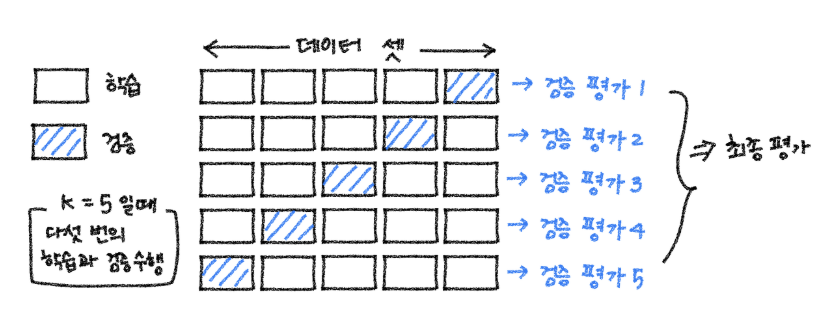

많은 데이터를 훈련하면 좋은 결과가 나온다
* 교차검증 : 검증세트를 떼어 내 평가하는 과정을 여러번 반복(패리티 방식)
* cross_validate()라는 교차검증 함수 사용

In [ ]:
from sklearn.model_selection import cross_validate
# cv 매개변수를 이용해 폴드 수 변경 가능 (기본값 : 5)
scores = cross_validate(dt, tri, trt) # 훈련세트 전체 사용
print(scores)
# fit_time(훈련시간), score_time(검증시간), test_score(최종점수) 키를 가진 딕셔너리(k : v)를 반환

In [ ]:
# mean : 평균 내는 함수
print('훈련시간',np.mean(scores['fit_time']))
print('검증시간',np.mean(scores['score_time']))
print('검증폴드 점수',np.mean(scores['test_score']))

* cross_validate()
    * 훈련세트를 섞어서 폴드를 나누지 않음
    * 기본적으로 회귀모델인 KFold분할기 사용
* 교차검증을 할때 훈련세트를 섞으려면 분할기(splitter)를 지정해야 한다.
* 사이킷런의 분할기 : 교차검증에서 폴드를 어떻게 나눌지 결정
* 분류모델 : 타깃 클래스를 골고루 나누기 위해 StratifiedKFold 사용

In [ ]:
from sklearn.model_selection import StratifiedKFold
scores = cross_validate(dt, tri, trt, cv = StratifiedKFold())
print(scores)
print('훈련시간',np.mean(scores['fit_time']))
print('검증시간',np.mean(scores['score_time']))
print('점수',np.mean(scores['test_score']))

In [ ]:
# 10 - 폴드 교차검증 수행
splitter = StratifiedKFold(n_splits = 10 , shuffle = True)
scores = cross_validate(dt, tri, trt, cv = splitter)
print(scores)
print('훈련시간',np.mean(scores['fit_time']))
print('검증시간',np.mean(scores['score_time']))
print('점수',np.mean(scores['test_score']))

하이퍼파라미터 튜닝
* 모델 파라미터 : 머신러닝 모델이 학습하는 파라미터
* 하이퍼파라미터 : 사용자가 지정해야 하는 파라미터
* 하이퍼파라미터 튜닝 : 라이브러리가 제공하는 기본값을 그대로 사용해 모델을 훈련
* 그 다음 검증세트의 점수나 교차 검증을 통해서 매개변수를 조금씩 변경 1 ~ 2, 5 ~ 6개의 매개변수를 제공한다
* AutoML : 사람의 개입없이 하이퍼파라미터 튜닝을 자동으로 수행하는 기술
*Max_dapth 를 최적으로 고정하고 min_sample_split을 바꿔가며 최적의 값을 찾는다. 면 값이 함께 변경됨
* -> 두개의 매개변수를 동시에 바꿔가며 최적의 값을 찾아야 됨 -> 다중 for문을 사용해야 돼서 복잡해짐
* 사이킷런에서 제공하는 그리드 서치(Grid Search)가 제공 GridSearchCV

In [ ]:
# 그리드서치로 크로스 검증
from sklearn.model_selection import GridSearchCV
# min_impurity_decrease 매개변수의 최적값 찾아보기
# min_sample_split : 샘플을 최소한 몇개 이상이어야 하위노드로 분리(split) 할 것인지
# 클수록 가지치기(과대적합방지), 적을 수록 정확하기(과대적합)
params = {'min_impurity_decrease': [0.0001,0.0002,0.0003,0.0004,0.0005]} # 0.0001 ~ 증가 5번
# 매개변수와 탐색할 값을 리스트를 딕셔너리로 만듬
print(params)

In [ ]:
# 결정트리 클래스 객체 생성하자마자 바로 전달
gs = GridSearchCV(DecisionTreeClassifier(),params, n_jobs = -1)
# 메서드 호출하면 서치 객체는 결정트리 모델 min_impurity_decrease값을 하나씩 바꿔가면서 총 5번 수행
# GridSearchCV의 cv매개변수 기본값 : 5 * min_impurity_decrease값 5 = 25번 수행
# n_jobs에서 병렬실행에 사용될 CPU코어 수 지정(-1 사용시 모든 코어 지정)
gs.fit(tri,trt) # 훈련

* 이렇게 최적화되어 훈련된 모델은 GridSearchCV클래스로 만들어진
* 객체의 best_estimator_ 속성에 저장되어 있고
* 최적의 매개변수는 best_params_ 속성에 저장되어 있다.

In [ ]:
print(f'그리드 서치를 통해 찾은 최적의 모델 정확도 : {dt.score(tri, trt)*100:.2f}%')
print(f'그리드 서치를 통해 찾은 최적의 매개변수 : {gs.best_params_}')
print(f'5번의 교차검증 결과 : {gs.cv_results_["mean_test_score"]}')
# 각 매개변수에서 수행한 교차 검증의 평균 전수는 cv_results_속성의 'mean_test_score'키에 저장돼있다.

넘파이를 이용해 argmax()함수를 사용하면 가장 큰 값의 인덱스를 추출할 수 있다.  이 인덱스를 사용해 params키에 저장된 매개변수 출력한 값이 최상의 검증 점수를 만든 매개변수의 조합이 된다.

In [ ]:
best_index = np.argmax(gs.cv_results_['mean_test_score'])
print('argmax() 함수를 통해 찾은 최적의 매개변수 : ',gs.cv_results_['params'][best_index])
print(f'그리드 서치를 통해 찾은 최적의 매개변수 : {gs.best_params_}')

과정 요약
1. 탐색할 매개변수 지정
    * params = {'min_impurity_decrease': [0.0001,0.0002,0.0003,0.0004,0.0005]} # 0.0001 ~ 증가 5번
2. 훈련세트에서 그리드 서치 수행하여 최상의 평균 검증 점수가 나오는 매개변수 조합을 찾아 그리드 서치에 저장
3. 그리드 서치는 최상의 매개변수에서 전체 훈련세트를 사용해 최종 모델을 훈련하고 그리드 서치에 저장

* 조금 더 복잡한 매개변수 조합해보기

In [ ]:
# 넘파이 arange()함수는 첫번째 매개변수 값에서 시작해 두번째 매개변수에
# 도달 할 때 까지 매개변수를 계속 더한 배열을 만든다
# 0.0001 ~ 0.001까지 0.0001을 더한 배열 = 9번 0.0001 ~ 0.0009
params = {'min_impurity_decrease':np.arange(0.0001,0.001,0.0001), # 9번
          # max_depth : 노드 분할을 위한 불순도 감소 최소량 지정
          'max_depth':range(5, 20, 1), # 5~20번까지 1씩 증가 = 15번
          # min_samples_split : 노드를 나누기 위한 최소 샘플 수
          'min_samples_split':range(2, 100, 10)} # 분할할 수 있는 샘플 수 2~100번까지 10번

gs = GridSearchCV(DecisionTreeClassifier(), params, n_jobs = -1)
gs.fit(tri,trt) # 훈련
# 교차 검증 횟수 9 * 15 * 10 = 1350개 * 5 - 폴드교차 = 6750개

In [ ]:
print('최상의 매개변수 조합 : ',gs.best_params_)
print('최상의 교차점수 : ',np.max(gs.cv_results_['mean_test_score']))

개선점 : 탐색할 매개변수 간격을 0.0001 혹은 1로 설정했는데 근거 부족으로 좁히거나 넓힐 필요성 있음

* 매개변수 값이 수치일 때 값의 범위나 간격을 미리 정하기가 어려울 수 있다
* 너무 많은 매개변수 조건이 있어서 그리드 서치 수행시간이 오래 걸린다
해결 방법 : 랜덤서치 사용
* 랜덤서치 : 매개변수 값이 목록을 전달하는 것이 아니라 매개변수를 샘플링 할 수 있는 확률 분포도 객체를 전달
* 싸이파이 : 파이썬의 핵심 과학 라이브러리로 적분,선형대수,확률 등을 포함한 수치 계산 전용 라이브러리다(코랩에 내장되어있음)
    * uniform, randint 클래스는 모두 주어진 범위에서 고르게 값을 뽑는다(균등 분포에서 샘플링)
    * randint()에서는 정수값 추출, uniform()에서는 실수값 추출

In [ ]:
from scipy.stats import uniform, randint
# 정수 테스트
rgen = randint(0,10) # 10개의 숫자 샘플링
print('난수 발생기(랜덤과 유사)',rgen.rvs(10))

# 1000개 샘플링해서 각 숫자의 갯수 세어보기
print(np.unique(rgen.rvs(1000), return_counts = True))

In [ ]:
# 실수 테스트
ugen = uniform(0,1) # 10개의 숫자 샘플링
print('난수 발생기(랜덤과 유사)',ugen.rvs(10))

In [ ]:
params = {'min_impurity_decrease':uniform(0.0001,0.001), # 0.0001~0.001 사이의 실수값
          'max_depth':randint(20,50), # 20~50 사이의 정수
          'min_samples_split':randint(2,25), # 2~25 사이의 정수
          'min_samples_leaf':randint(1,25)} # 1~25 사이의 정수

# 샘플링 횟수는 사이킷런의 랜덤서치 클래스인 RandomizedSearchCV의 n_iter매개변수에 저장
from sklearn.model_selection import RandomizedSearchCV
# n_iter = 100 : 총 100번 샘플링해서 교차검증 수행(최적의 매개변수 조합을 찾음)
gs = RandomizedSearchCV(DecisionTreeClassifier(),params,n_iter = 100, n_jobs = -1)
gs.fit(tri,trt)

In [ ]:
print(gs.best_params_)
print('최적의 교차검증점수 : ', np.max(gs.cv_results_['mean_test_score']))
dt = gs.best_estimator_
# 최종모델 결정 후 테스트세트 성능 확인
print(dt.score(tei, tet))

# 트리_앙상블

* 앙상블 : 단어 그대로 여러 단순한 모델을 결합하여 정확한 모델을 만드는 방법
* 정형데이터 : 지금까지 학습한 수치자료가 있는 값
* 비정형데이터 : 데이터베이스나 엑셀로 표현하기 어려운 데이터
    * (텍스트데이터, 디카사진, mp3 등) -> 신경망 알고리즘
* 랜덤 포레스트 : 결정 트리를 랜덤하게 만들어 결정트리(나무)숲을 만듬 -> 최종 예측

1. 1000개의 샘플이 들어있는 가방에서 100개의 샘플을 뽑을 때 1개를 뽑고
2. 뽑았던 1개를 다시  가방에 넣음 (중복된 샘플을 뽑을 수 있다 -> 부트스트랩 샘플)

* 부트스트랩 : 데이터 세트에서 중복을 허용해 데이터를 샘플링

분류 모델 RandomForestClassifier는 기본적으로 전체 특성 개수의 제곱근만큼 특성을 선택한다.

즉 4개의 특성이 있다면 노드마다 2개를 랜덤하게 선택해서 사용한다. 다만 최귀모델인 RandomForestRegressor는 전체 특성을 사용

사이킷런의 랜덤 포레스트는 기본적으로 100개의 결정 트리를 이런 방식으로 훈련한다.

그 다음 분류일 때는 각 트리의 클래스별 확률을 평균하여 가장 높은 확률을 가진 클래스를 예측으로 삼고 회귀일때는 단순히 각 트리의 예측을 평균한다.

* 분류 : 샘플을 몇개의 클래스 중 하나로 분류하는 문제
* 회귀 : 임의의 어떤 숫자를 예측하는 문제

In [ ]:
data = wine[['alcohol', 'sugar','pH']].to_numpy()
target = wine['class'].to_numpy()
print('data \n',data)
print('target \n', target)

In [ ]:
# 훈련세트,테스트세트 나누기
tri, tei, trt, tet = train_test_split(data, target, test_size = 0.2)
print('훈련세트', trt.shape,'테스트세트',tei.shape)

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs = -1)
# n_jobs에 -1 입력하면 모든 cpu사용한다는 뜻
# return_train_score = True : 검증점수와 훈련세트에 대한 점수도 리턴
scores = cross_validate(rf, tri, trt, return_train_score = True, n_jobs = -1)
print('훈련점수',np.mean(scores['train_score']),'테스트점수',np.mean(scores['test_score']))

In [ ]:
# 훈련 후 특성 중요도 출력
rf.fit(tri, trt)
print(rf.feature_importances_)